In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('laptop_price_data.csv')

In [71]:
df.head()

,index,brand,Model,gpu_type,Vram,processor_brand,processor_tier,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,OS,Price
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,integrated,0,intel,core i3,8,True,512,False,15.6,1920,1080,windows,23990
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,integrated,0,intel,core i7,16,True,1024,False,15.6,1920,1080,windows,35990
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,dedicated,4,amd,ryzen 5,8,True,512,False,15.6,1920,1080,windows,51100
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,integrated,0,intel,core i5,8,True,512,False,14.0,1920,1080,windows,39990
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,integrated,0,amd,ryzen 3,8,True,512,False,15.6,1920,1080,windows,28580


In [72]:
df.shape

(991, 16)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   Model                     991 non-null    object 
 3   gpu_type                  991 non-null    object 
 4   Vram                      991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   ram_memory                991 non-null    int64  
 8   primary_storage_type      991 non-null    bool   
 9   primary_storage_capacity  991 non-null    int64  
 10  is_touch_screen           991 non-null    bool   
 11  display_size              991 non-null    float64
 12  resolution_width          991 non-null    int64  
 13  resolution_height         991 non-null    int64  
 14  OS        

In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()

index                       0
brand                       0
Model                       0
gpu_type                    0
Vram                        0
processor_brand             0
processor_tier              0
ram_memory                  0
primary_storage_type        0
primary_storage_capacity    0
is_touch_screen             0
display_size                0
resolution_width            0
resolution_height           0
OS                          0
Price                       0
dtype: int64

In [76]:
df['ppi'] = (((df['resolution_width']**2) + (df['resolution_height']**2))**0.5/df['display_size']).astype('float')
df.drop(columns=['index','display_size','resolution_width', 'resolution_height', 'Model'],inplace=True)

In [77]:
df['cpu'] = df['processor_brand'] + ' ' + df['processor_tier']
df['cpu'].value_counts()
df.drop(columns=['processor_brand', 'processor_tier'],inplace=True)

In [78]:
df.shape

(991, 11)

In [79]:
df.head()

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,Price,ppi,cpu
0,tecno,integrated,0,8,True,512,False,windows,23990,141.211998,intel core i3
1,tecno,integrated,0,16,True,1024,False,windows,35990,141.211998,intel core i7
2,hp,dedicated,4,8,True,512,False,windows,51100,141.211998,amd ryzen 5
3,acer,integrated,0,8,True,512,False,windows,39990,157.350512,intel core i5
4,lenovo,integrated,0,8,True,512,False,windows,28580,141.211998,amd ryzen 3


In [80]:
import seaborn as sns

C:\Users\prave\AppData\Local\Temp\ipykernel_28664\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

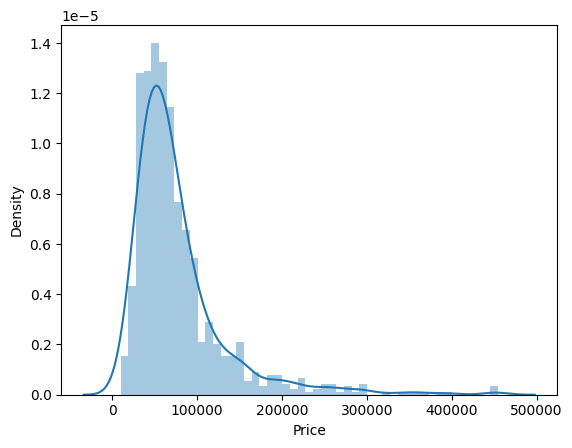

In [81]:
sns.distplot(df['Price'])

<Axes: xlabel='brand'>

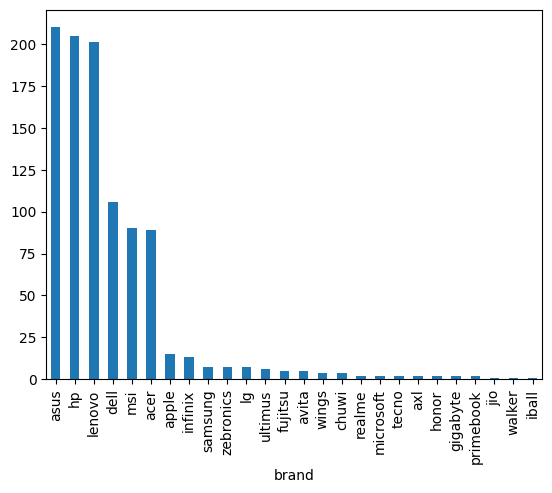

In [82]:
df['brand'].value_counts().plot(kind='bar')

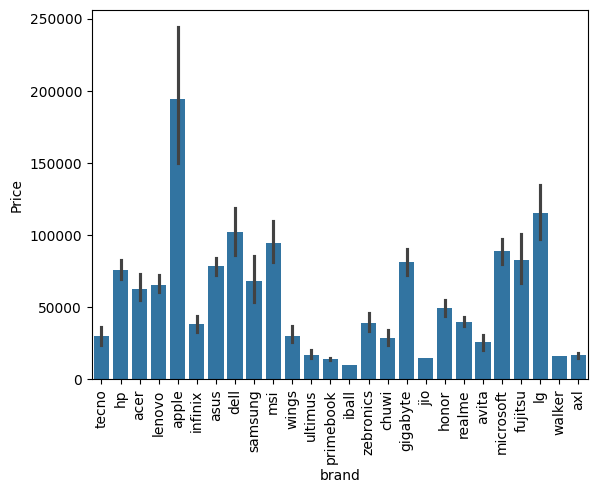

In [83]:
sns.barplot(x=df['brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
df.sample(5)

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,Price,ppi,cpu
925,acer,dedicated,4,8,True,512,False,windows,45990,141.211998,intel core i5
733,asus,dedicated,4,16,True,512,False,windows,69990,161.725391,intel core i5
66,hp,dedicated,4,16,True,512,False,windows,71990,141.211998,intel core i5
802,asus,dedicated,6,16,True,1024,False,windows,133890,141.211998,intel core i7
361,lenovo,dedicated,4,8,True,512,False,windows,70190,141.211998,amd ryzen 7


<Axes: xlabel='is_touch_screen'>

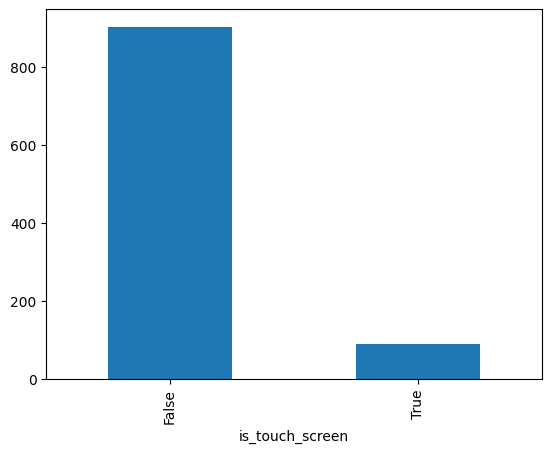

In [85]:
df['is_touch_screen'].value_counts().plot(kind='bar')

<Axes: xlabel='is_touch_screen', ylabel='Price'>

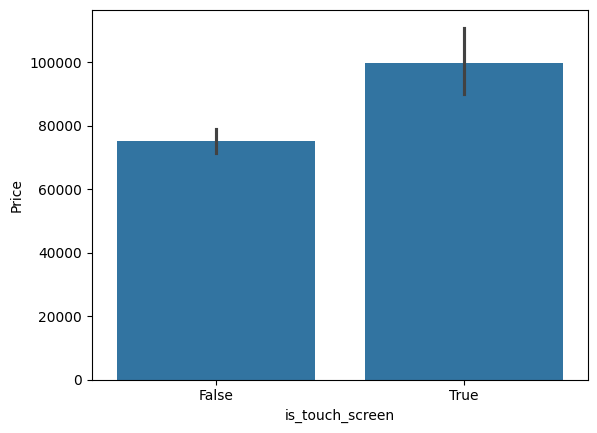

In [86]:
sns.barplot(x=df['is_touch_screen'],y=df['Price'])

In [87]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()['Price']

Vram                        0.660382
ram_memory                  0.633124
primary_storage_capacity    0.636343
Price                       1.000000
ppi                         0.544097
Name: Price, dtype: float64

In [88]:
df.head(1)

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,Price,ppi,cpu
0,tecno,integrated,0,8,True,512,False,windows,23990,141.211998,intel core i3


<Axes: xlabel='cpu'>

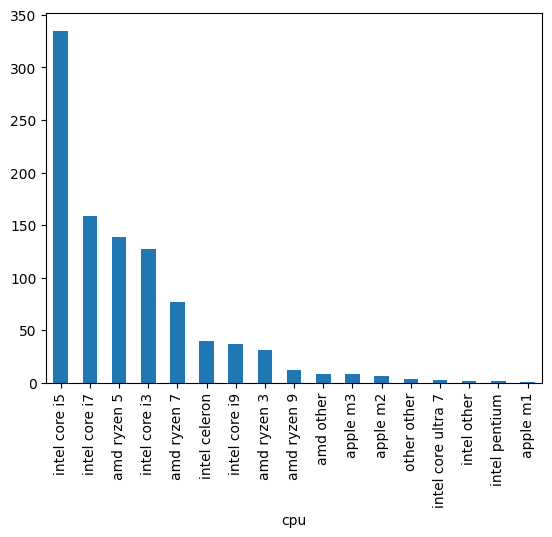

In [89]:
df['cpu'].value_counts().plot(kind='bar')

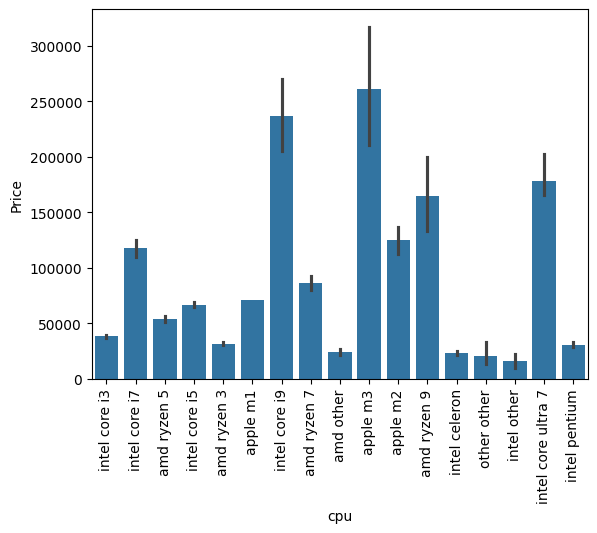

In [90]:
sns.barplot(x=df['cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ram_memory'>

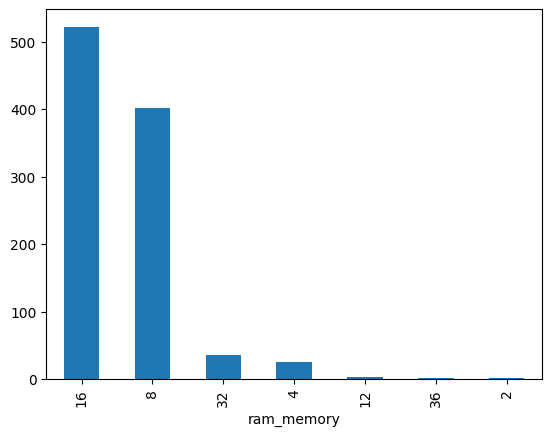

In [91]:
df['ram_memory'].value_counts().plot(kind='bar')

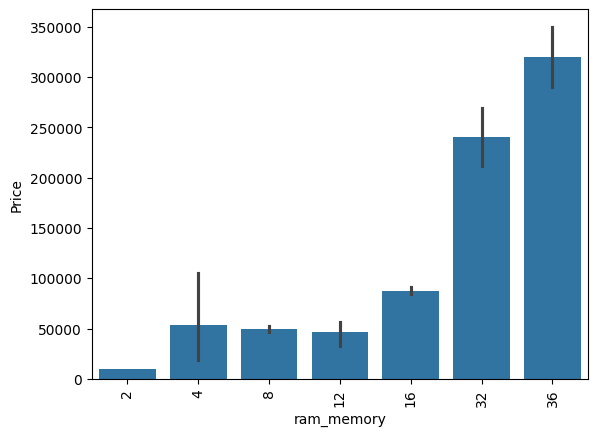

In [92]:
sns.barplot(x=df['ram_memory'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Vram'>

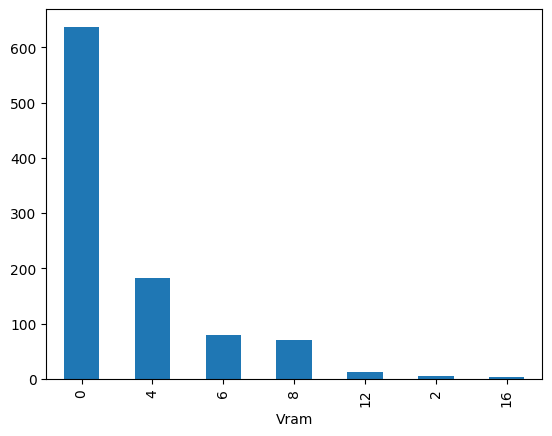

In [93]:
df['Vram'].value_counts().plot(kind='bar')

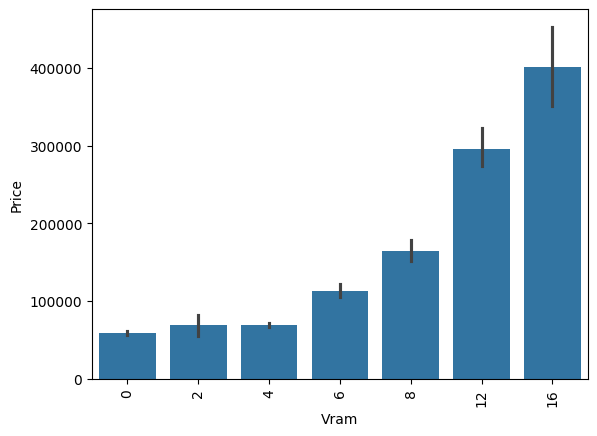

In [94]:
sns.barplot(x=df['Vram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [95]:
df['primary_storage_capacity'].value_counts()

primary_storage_capacity
512     708
1024    208
256      45
128      11
64        9
2048      8
32        2
Name: count, dtype: int64

In [96]:
df['gpu_type'].value_counts()

gpu_type
integrated    620
dedicated     356
apple          15
Name: count, dtype: int64

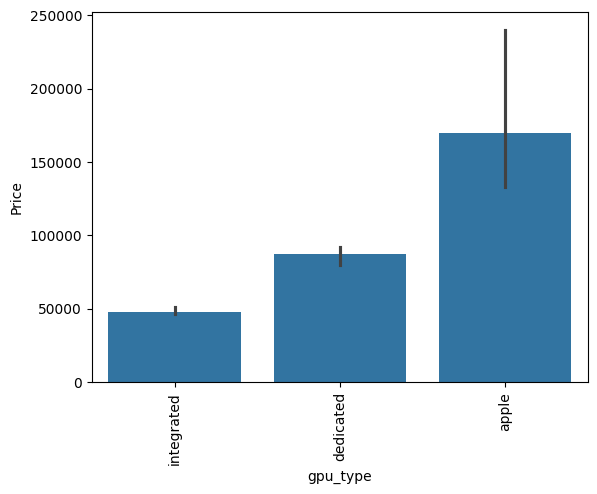

In [97]:
sns.barplot(x=df['gpu_type'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [98]:
df['OS'].value_counts()

OS
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

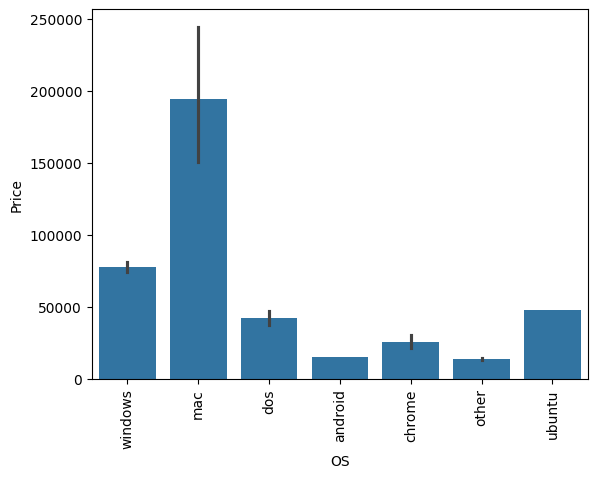

In [99]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

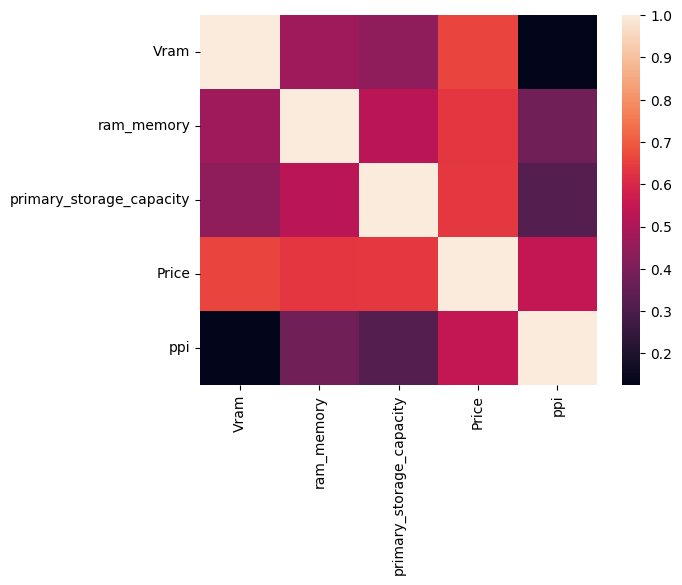

In [100]:
sns.heatmap(df_numeric.corr())

C:\Users\prave\AppData\Local\Temp\ipykernel_28664\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

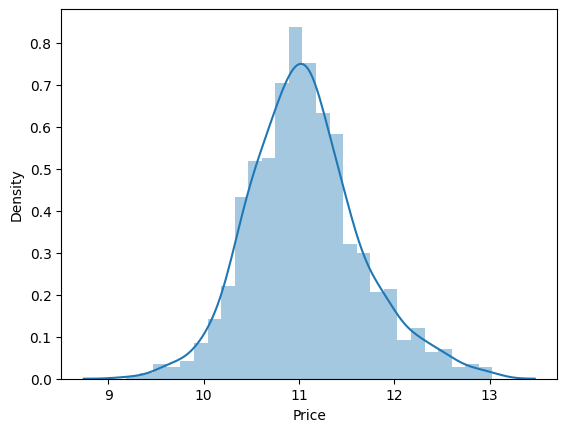

In [101]:
sns.distplot(np.log(df['Price']))

In [102]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [103]:
X

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,ppi,cpu
0,tecno,integrated,0,8,True,512,False,windows,141.211998,intel core i3
1,tecno,integrated,0,16,True,1024,False,windows,141.211998,intel core i7
2,hp,dedicated,4,8,True,512,False,windows,141.211998,amd ryzen 5
3,acer,integrated,0,8,True,512,False,windows,157.350512,intel core i5
4,lenovo,integrated,0,8,True,512,False,windows,141.211998,amd ryzen 3
...,...,...,...,...,...,...,...,...,...,...
986,asus,dedicated,4,16,True,512,False,windows,141.211998,amd ryzen 5
987,msi,dedicated,6,16,True,512,False,windows,141.211998,intel core i7
988,asus,integrated,0,8,True,512,False,windows,141.211998,amd ryzen 5
989,asus,integrated,0,16,True,512,False,windows,215.633854,amd ryzen 5


In [104]:
y

0      10.085392
1      10.490996
2      10.841540
3      10.596385
4      10.260462
         ...    
986    11.097258
987    11.429435
988    10.714196
989    11.127116
990     9.951801
Name: Price, Length: 991, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [106]:
# X_train

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [110]:
X_train

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,ppi,cpu
513,hp,dedicated,8,32,True,1024,False,windows,182.435376,amd ryzen 9
192,jio,integrated,0,4,False,64,False,other,135.094211,other other
284,dell,integrated,0,8,False,1024,False,windows,141.211998,intel core i5
937,msi,integrated,0,8,True,512,False,windows,141.211998,amd ryzen 5
288,chuwi,integrated,0,8,True,256,False,windows,156.234551,intel other
...,...,...,...,...,...,...,...,...,...,...
534,lenovo,integrated,0,16,True,512,False,windows,137.681698,intel core i7
584,lenovo,dedicated,6,16,True,512,False,windows,141.211998,amd ryzen 7
493,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5
527,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5


In [111]:
# X.head(1)

### Linear regression

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9120241854105706
MAE 0.13025749057372754


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Ridge Regression

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8803237636282591
MAE 0.1452223271551944


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Lasso Regression

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8964709265872165
MAE 0.13743968041307797


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### KNN

In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7779243231951223
MAE 0.18432022297304912


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Decision Tree

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7975742498130018
MAE 0.17409728323766543


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### SVM

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8823650885551764
MAE 0.140446880383124


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Random Forest

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.862996661593515
MAE 0.14713788498515606


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [119]:
X_train

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,ppi,cpu
513,hp,dedicated,8,32,True,1024,False,windows,182.435376,amd ryzen 9
192,jio,integrated,0,4,False,64,False,other,135.094211,other other
284,dell,integrated,0,8,False,1024,False,windows,141.211998,intel core i5
937,msi,integrated,0,8,True,512,False,windows,141.211998,amd ryzen 5
288,chuwi,integrated,0,8,True,256,False,windows,156.234551,intel other
...,...,...,...,...,...,...,...,...,...,...
534,lenovo,integrated,0,16,True,512,False,windows,137.681698,intel core i7
584,lenovo,dedicated,6,16,True,512,False,windows,141.211998,amd ryzen 7
493,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5
527,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5


### Gradient Boost

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

# print(X_t)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9256357176877135
MAE 0.11986381231857382


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### XgBoost

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown = 'ignore'),[0,1,4,7,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9022469129775141
MAE 0.13296296059950716


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Exporting the Model

In [122]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [123]:
df

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,Price,ppi,cpu
0,tecno,integrated,0,8,True,512,False,windows,23990,141.211998,intel core i3
1,tecno,integrated,0,16,True,1024,False,windows,35990,141.211998,intel core i7
2,hp,dedicated,4,8,True,512,False,windows,51100,141.211998,amd ryzen 5
3,acer,integrated,0,8,True,512,False,windows,39990,157.350512,intel core i5
4,lenovo,integrated,0,8,True,512,False,windows,28580,141.211998,amd ryzen 3
...,...,...,...,...,...,...,...,...,...,...,...
986,asus,dedicated,4,16,True,512,False,windows,65990,141.211998,amd ryzen 5
987,msi,dedicated,6,16,True,512,False,windows,91990,141.211998,intel core i7
988,asus,integrated,0,8,True,512,False,windows,44990,141.211998,amd ryzen 5
989,asus,integrated,0,16,True,512,False,windows,67990,215.633854,amd ryzen 5


In [124]:
X_train

,brand,gpu_type,Vram,ram_memory,primary_storage_type,primary_storage_capacity,is_touch_screen,OS,ppi,cpu
513,hp,dedicated,8,32,True,1024,False,windows,182.435376,amd ryzen 9
192,jio,integrated,0,4,False,64,False,other,135.094211,other other
284,dell,integrated,0,8,False,1024,False,windows,141.211998,intel core i5
937,msi,integrated,0,8,True,512,False,windows,141.211998,amd ryzen 5
288,chuwi,integrated,0,8,True,256,False,windows,156.234551,intel other
...,...,...,...,...,...,...,...,...,...,...
534,lenovo,integrated,0,16,True,512,False,windows,137.681698,intel core i7
584,lenovo,dedicated,6,16,True,512,False,windows,141.211998,amd ryzen 7
493,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5
527,lenovo,integrated,0,16,True,512,False,windows,141.509717,intel core i5


In [125]:
query = np.array(['lenovo', 'dedicated', 0, 8, True, 512, False, 'windows', 141.51, 'intel core i7'], dtype=object) # Make sure False is a boolean
query = query.reshape(1,10)
# query[:, 6] = query[:, 6].astype(bool)
ans = pipe.predict(query)
print(ans)

[11.233671]


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
